In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
from collections import Counter
import copy

## Code for Answer 2:


In [2]:
def generate_permutation(n,a):
    array = np.arange(1,n+1)
    random_permutation = np.random.permutation(array)
    while np.dot(array.T, random_permutation) <= a:
        random_permutation = np.random.permutation(array)
    return random_permutation

In [3]:
def get_freq(iterationsations, a, n):
    freq_dict = {}
    for i in range(iterations):
        permutation = tuple(generate_permutation(n,a))
        if permutation in freq_dict.keys():
            freq_dict[permutation] += 1
        else:
            freq_dict[permutation] = 1
    return freq_dict

In [4]:
n = 4
p = 21
a = p
iterations = 1000*p

In [5]:
reqd_freq = get_freq(iterations,a,n)

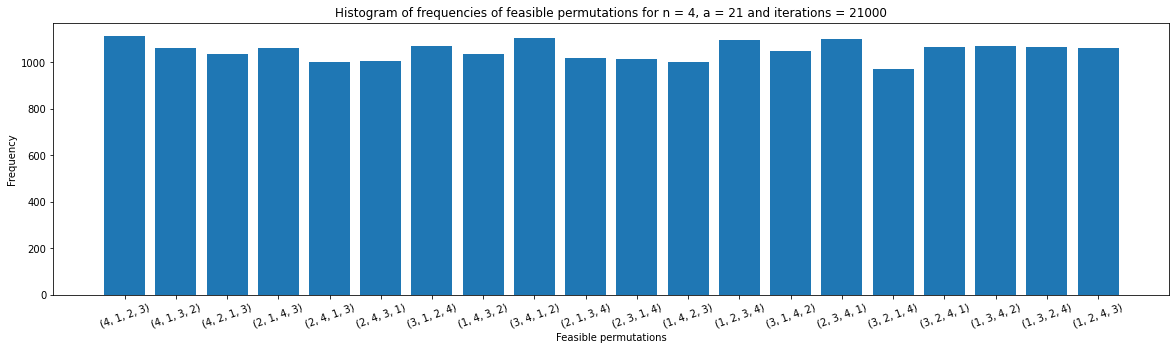

In [6]:
plt.figure(figsize = (20,5))
permutation_list = [str(key) for key in reqd_freq.keys()]
plt.bar(permutation_list , reqd_freq.values(), align='center')
plt.title(f"Histogram of frequencies of feasible permutations for n = {n}, a = {a} and iterations = {iterations}")
plt.xlabel("Feasible permutations")
plt.ylabel("Frequency")
plt.xticks(permutation_list, rotation = 20)
plt.show()

## Code for Answer 3:

In [7]:
def feasible_neighbors_mcmc(permutation_state, a, n):
    feasible_neighbors = []
    array = np.arange(1,n+1)
    np.array(permutation_state)
    for i in range(len(permutation_state)):
        for j in range(len(permutation_state)):
            temp = copy.deepcopy(permutation_state)
            temp[i], temp[j] = temp[j], temp[i] 
            if ((np.dot(array.T, temp) > a) == True) and ((temp not in feasible_neighbors) == True) and (temp != permutation_state):
                feasible_neighbors.append(temp)
    return feasible_neighbors

In [8]:
feasible_neighbors_list = {}
feasible_permutations = reqd_freq.keys()

for state in feasible_permutations:
    feasible_neighbors_list[state] = feasible_neighbors_mcmc(list(state), a, n)

In [9]:
print("Total number of feasible permutations:", len(feasible_neighbors_list.keys()))
print()
for key in feasible_neighbors_list.keys():
    print("\nNumber of neighbours for state", key, "is", len(feasible_neighbors_list[key]), "and one of it's randomly generated neighbour:", random.choice(feasible_neighbors_list[key]))

Total number of feasible permutations: 20


Number of neighbours for state (4, 1, 2, 3) is 5 and one of it's randomly generated neighbour: [3, 1, 2, 4]

Number of neighbours for state (4, 1, 3, 2) is 4 and one of it's randomly generated neighbour: [3, 1, 4, 2]

Number of neighbours for state (4, 2, 1, 3) is 4 and one of it's randomly generated neighbour: [1, 2, 4, 3]

Number of neighbours for state (2, 1, 4, 3) is 6 and one of it's randomly generated neighbour: [2, 3, 4, 1]

Number of neighbours for state (2, 4, 1, 3) is 6 and one of it's randomly generated neighbour: [2, 1, 4, 3]

Number of neighbours for state (2, 4, 3, 1) is 4 and one of it's randomly generated neighbour: [2, 4, 1, 3]

Number of neighbours for state (3, 1, 2, 4) is 5 and one of it's randomly generated neighbour: [4, 1, 2, 3]

Number of neighbours for state (1, 4, 3, 2) is 6 and one of it's randomly generated neighbour: [1, 3, 4, 2]

Number of neighbours for state (3, 4, 1, 2) is 4 and one of it's randomly generated 

## Code for Answer 5:

In [10]:
def mcmc_approach(a, n, iters):
    X_states = []
    X = generate_permutation(n, a)
    for i in range(iters):
        nbs = feasible_neighbors_mcmc(list(X), a, n)
        X_next = random.choice(nbs)
        prob = 1/len(nbs)
        nbs_other = feasible_neighbors_mcmc(list(X_next), a, n)
        X_other = random.choice(nbs_other)
        prob_other = 1/len(nbs_other)

        unif = np.random.rand()
        if unif < min(1, prob_other/prob):
            X = X_next
        X_states.append(tuple(X))
    return X_states

In [11]:
X_states =  mcmc_approach(a, n, iterations)
count_dict = Counter(X_states)
labels = [str(key) for key in count_dict.keys()]
print(random.choice(X_states))

(2, 4, 1, 3)


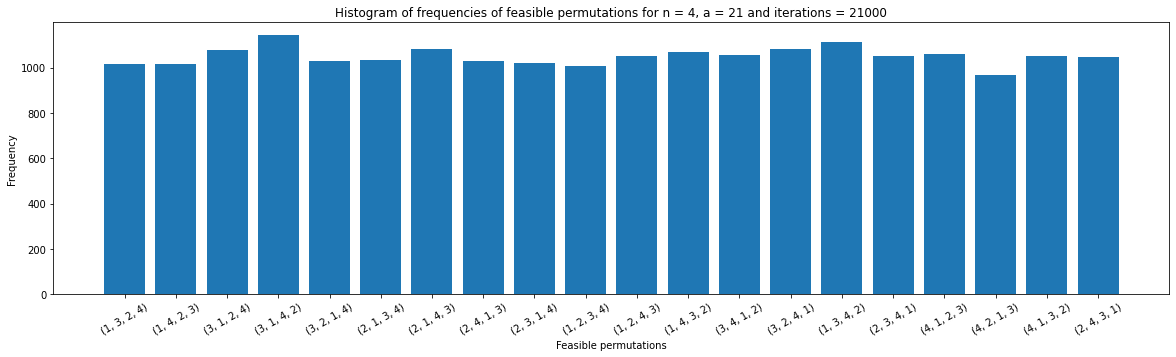

In [12]:
plt.figure(figsize = (20,5))
plt.bar(labels, count_dict.values(), align = 'center')
plt.title(f"Histogram of frequencies of feasible permutations for n = {n}, a = {a} and iterations = {iterations}")
plt.xlabel("Feasible permutations")
plt.ylabel("Frequency")
plt.xticks(labels, rotation = 30)
plt.show()

#### **$n = 4$ and $a = 10$:**

In [13]:
a = 10
n = 4

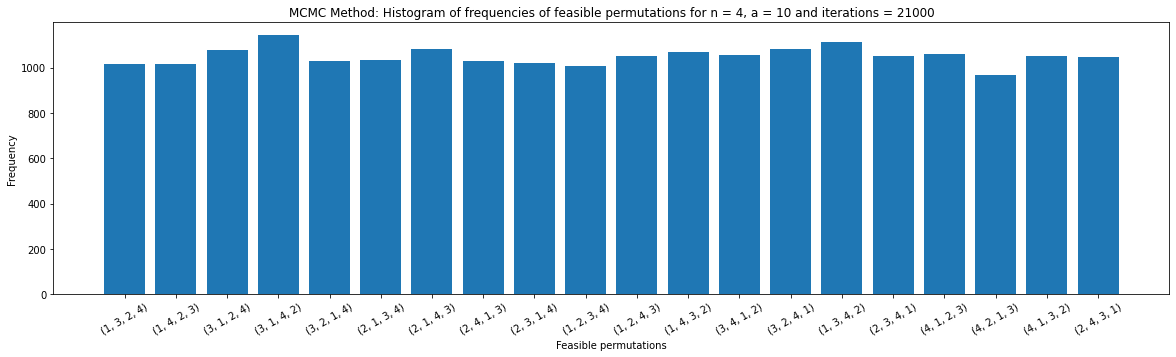

In [14]:
count_dict = Counter(X_states)
labels = [str(key) for key in count_dict.keys()]
plt.figure(figsize = (20,5))
plt.bar(labels, count_dict.values(), align = 'center')
plt.title(f"MCMC Method: Histogram of frequencies of feasible permutations for n = {n}, a = {a} and iterations = {iterations}")
plt.xlabel("Feasible permutations")
plt.ylabel("Frequency")
plt.xticks(labels, rotation = 30)
plt.show()

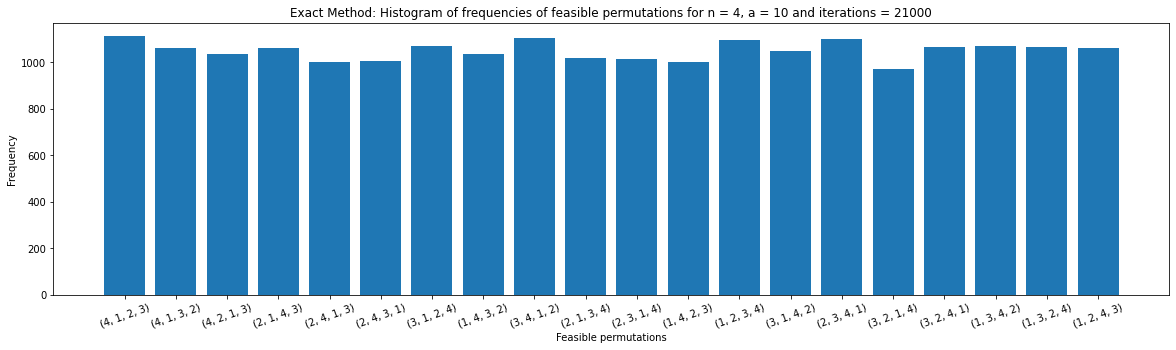

In [15]:
plt.figure(figsize = (20,5))
permutation_list = [str(key) for key in reqd_freq.keys()]
plt.bar(permutation_list , reqd_freq.values(), align='center')
plt.title(f"Exact Method: Histogram of frequencies of feasible permutations for n = {n}, a = {a} and iterations = {iterations}")
plt.xlabel("Feasible permutations")
plt.ylabel("Frequency")
plt.xticks(permutation_list, rotation = 20)
plt.show()

**Observations:** From both the methods (Exact Approach and MCMC Approach), we get similar output. For all feasible permutations, frequency is almost similar. Therefore we have discrete uniform distribution. In the two cases when n=4 and a=p=21 and when n=4 and a=int(p/2)=10, all permutations come out to be feasible.